In [61]:
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [56]:
S01_S07_res = ['LYS_5', 'ARG_131', 'GLU_166', 'HIS_172', 'ASP_216', 'GLU_288',
               'GLU_290', 'TYR_360', 'ARG_411', 'ARG_494', 'ASP_522',
               'ARG_585']
S01_S09_res = ['ARG_4', 'GLU_166', 'HIS_172', 'CYS_300', 'LYS_318', 'ASP_522',
               'ARG_585']
S01_p12_res = ['HIS_41', 'HIS_164', 'HIS_172', 'ASP_216', 'LYS_318', 'ASP_522',
               'ARG_585']
S01_p13_res = ['GLU_14', 'TYR_54', 'GLU_166', 'ASP_354', 'TYR_360', 'ARG_494',
               'ASP_522', 'ARG_585']

In [52]:
# path names
root = Path().resolve()
path = root/'dataset'/'Henry_Mpro_pKa'

In [53]:
# the function to read data
def read_data(name):
    table_data = pd.DataFrame({})
    dataset_path = path/name
    for dp in dataset_path.iterdir():
        # structure.pdb does not need to be read here
        if dp.name != 'structure.pdb':
            temp_table = pd.read_table(dp, header=None, names=['#1', '#2'])
            temp_array = (list)(temp_table['#2'])
            table_data[dp.name] = temp_array
            warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    return table_data

In [54]:
S01_table = read_data(name='S01')
S07_table = read_data(name='S07')
S09_table = read_data(name='S09')
p12_table = read_data(name='p12')
p13_table = read_data(name='p13')

In [67]:
S07_target_table = S07_table[S01_S07_res]
S09_target_table = S09_table[S01_S09_res]
p12_target_table = p12_table[S01_p12_res]
p13_target_table = p13_table[S01_p13_res]

S07_sample = S07_target_table[0:300]
S09_sample = S09_target_table[0:300]
p12_sample = p12_target_table[0:300]
p13_sample = p13_target_table[0:300]

In [68]:
S01_label = np.full(300, 'S01')
S07_label = np.full(300, 'S07')
S01_S07_label = np.append(S01_label, S07_label)

S01_target_table = S01_table[S01_S07_res]
S01_sample = S01_target_table[0:300]
S01_S07_sample = pd.concat([S01_sample, S07_sample], ignore_index=True)
S01_S07_data = S01_S07_sample.to_numpy()

scaler = StandardScaler()
S01_S07_scaled = scaler.fit_transform(S01_S07_data)

In [69]:
pca_transfer = PCA(n_components=2, random_state=42)
S01_S07_pca = pca_transfer.fit_transform(S01_S07_scaled)

In [70]:
S01_S07_pca

array([[-1.38792164, -1.18230337],
       [-1.46723039, -0.31287329],
       [-1.13168452, -0.97928124],
       ...,
       [ 5.77344968, -1.06706565],
       [ 4.60397201, -0.43009882],
       [ 4.28824462, -1.26614379]])

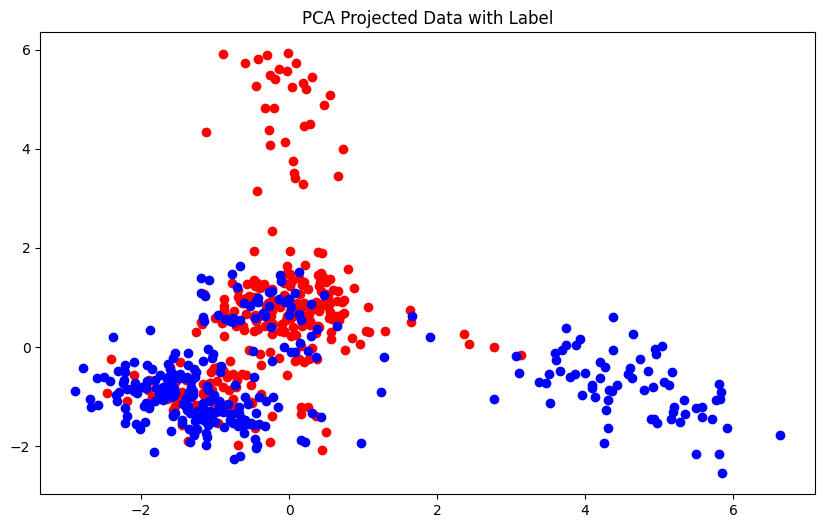

In [71]:
plt.figure(figsize=(10, 6))

for i in range(len(S01_S07_label)):
    if S01_S07_label[i] == 'S01':
        plt.plot(S01_S07_pca[i][0], S01_S07_pca[i][1], 'ro')
    elif S01_S07_label[i] == 'S07':
        plt.plot(S01_S07_pca[i][0], S01_S07_pca[i][1], 'bo')

plt.title('PCA Projected Data with Label')
plt.show()